In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns     #seaborn画出的图更好看，且代码更简单，缺点是可塑性差
from statsmodels.graphics.tsaplots import plot_acf  #自相关图
from statsmodels.tsa.stattools import adfuller as ADF  #平稳性检测
from statsmodels.graphics.tsaplots import plot_pacf    #偏自相关图
from statsmodels.stats.diagnostic import acorr_ljungbox    #白噪声检验
from statsmodels.tsa.arima_model import ARIMA

In [2]:
data = pd.read_csv('./Data/datafull.csv',index_col='time')

In [3]:
data

,PM2.5,PM10,SO2,NO2,O3,CO,TEMP,PRES,RAIN,HUMI,DEWP,WD,WS,EWS,NWS
time,,,,,,,,,,,,,,,
2014-01-01 01:00:00,58.0,154.0,39.0,84.0,4.0,1.5,-1.1,1008.8,0.0,40.0,-13.0,NW,1.2,-0.848528,-0.848528
2014-01-01 02:00:00,68.0,162.0,39.0,85.0,4.0,1.7,-1.4,1008.8,0.0,41.0,-13.0,SW,0.7,-0.494975,-0.494975
2014-01-01 03:00:00,83.0,189.0,63.0,83.0,5.0,1.7,-2.4,1008.2,0.0,46.0,-12.5,SE,0.6,0.424264,0.424264
2014-01-01 04:00:00,75.0,190.0,55.0,83.0,3.0,2.1,-2.5,1008.0,0.0,46.0,-12.6,CV,0.4,0.000000,0.000000
2014-01-01 05:00:00,83.0,189.0,49.0,84.0,6.0,2.4,-2.1,1008.3,0.0,45.0,-12.5,SE,0.5,0.353553,0.353553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-31 19:00:00,112.0,112.0,28.0,114.0,23.0,2.3,-1.4,1026.3,0.0,58.0,-8.6,SE,1.0,0.707107,0.707107
2015-12-31 20:00:00,122.0,132.0,27.0,118.0,26.0,3.2,-2.5,1026.2,0.0,64.0,-8.4,SE,1.3,0.919239,0.919239
2015-12-31 21:00:00,149.0,179.0,30.0,125.0,31.0,4.5,-2.7,1025.8,0.0,67.0,-8.0,NE,0.9,0.636396,0.636396


array([<AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>],
      dtype=object)

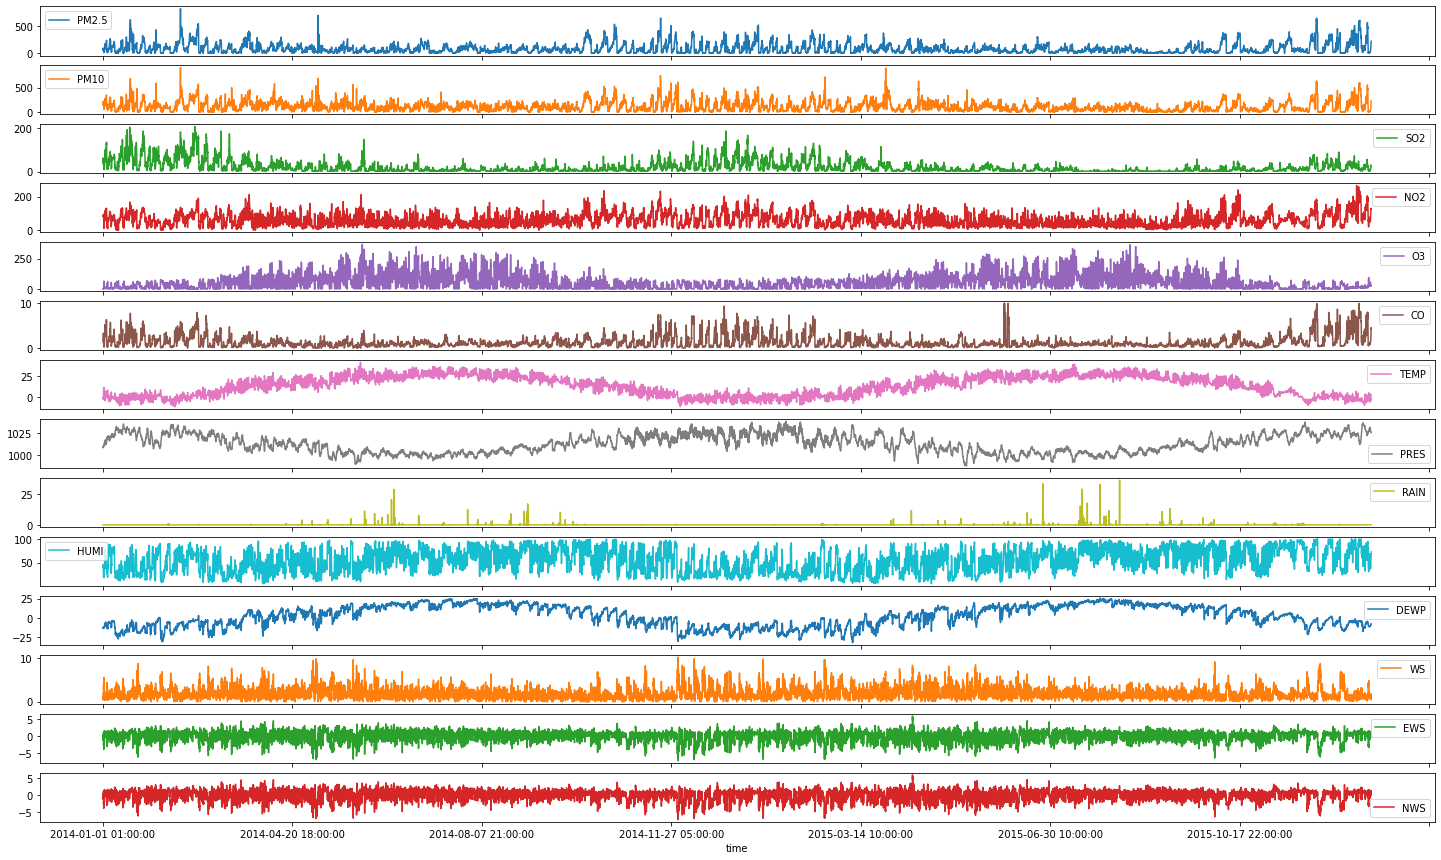

In [4]:
data.plot(subplots = True,figsize=(25,15),legend  = True)

In [5]:
weather = ['TEMP','PRES','RAIN','HUMI','EWS','NWS']

array([<AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>], dtype=object)

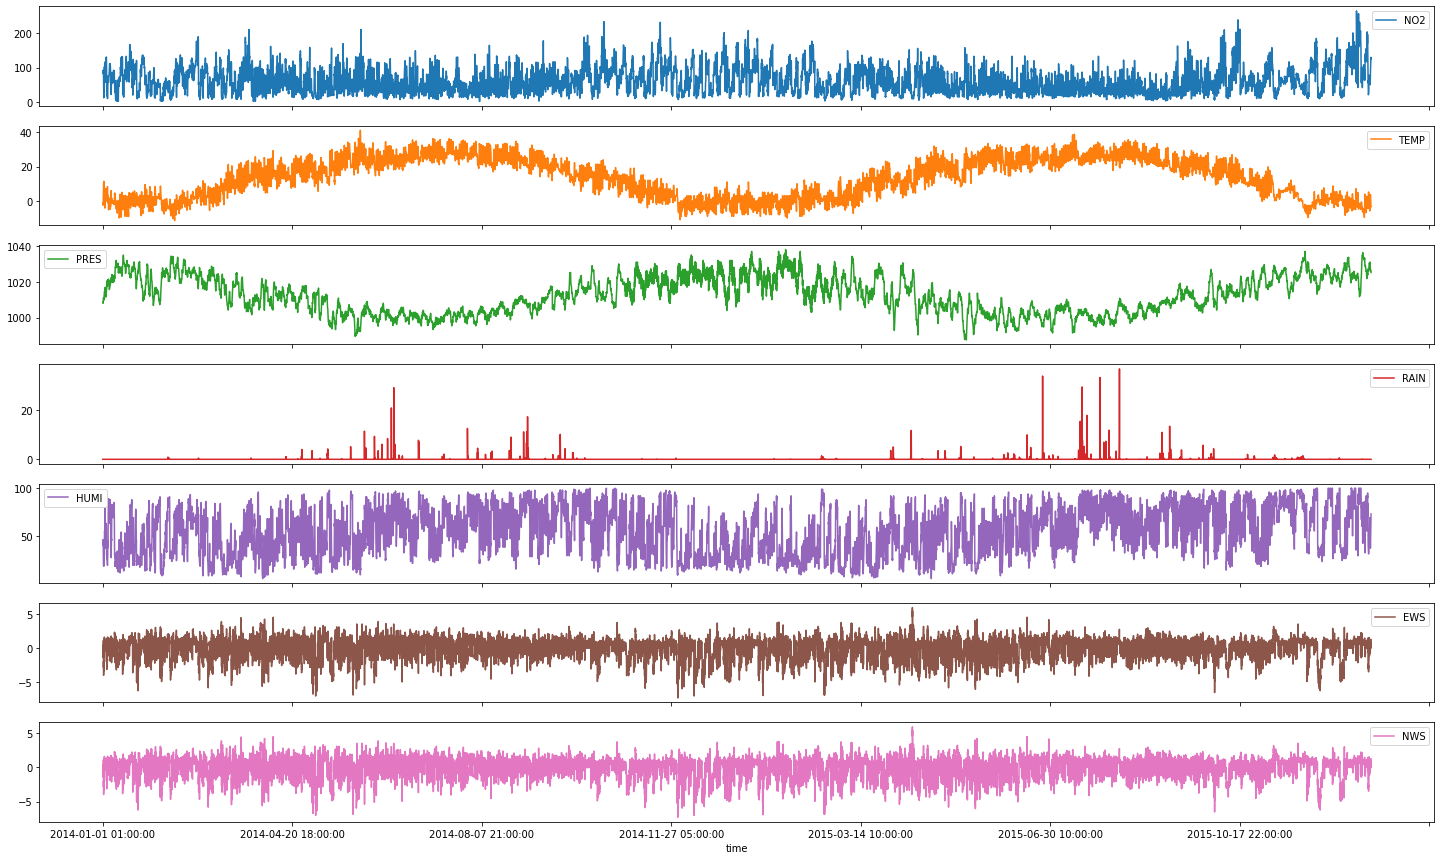

In [10]:
data[['NO2','TEMP','PRES','RAIN','HUMI','EWS','NWS']].plot(subplots = True,figsize=(25,15),legend  = True)

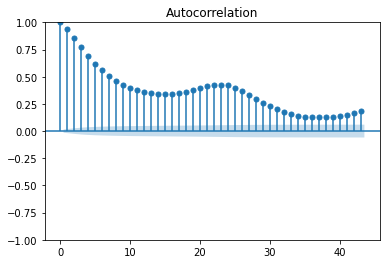

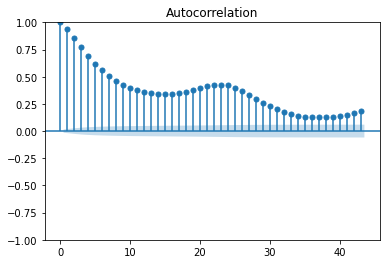

In [14]:
plot_acf(data['NO2'])